<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/M%C3%A9todo%20de%20Aceptaci%C3%B3n%20y%20Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Aceptación y Rechazo

El método de aceptación y rechazo es una técnica general para generar variables aleatorias cuando la función de densidad no permite una transformación directa.
Consiste en proponer muestras de una distribución más simple y luego aceptarlas o rechazarlas según una condición basada en la relación entre la densidad de la distribución deseada y la densidad de la distribución propuesta.



*   **PASO 1:** Generar dos números aleatorios $R_1$ y $R_2$
*   **PASO 2:** Determinar $x$
$$ x = a + (c-a) R_1 $$
*   **PASO 3:** Evaluar $f$ en $x$
*   **PASO 4:** Si $R_2 ≤ \frac{f(x)}{M}$, aceptar $x$. Otro caso, rechazar $x$


La distribución triangular con parámetros $a$ (mínimo), $b$ (máximo) y $c$ (modo), tiene una forma triangular (como su nombre indica) y su función de densidad es:
$$
f(x) =
\begin{cases}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si } a \leq x \leq b \\
\frac{-2(x - c)}{(c - a)(c - b)} & \text{si } b < x \leq c
\end{cases}
$$

El siguiente código implementa el método de Aceptación y Rechazo para generar la distribución triangular de parámetros a=1, b=3, c=5.

In [8]:
# Importamos las librerías necesarias
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Parámetros de la distribución triangular
a = 1 # mínimo
b = 3  # modo
c = 5 # máximo

# Función de densidad f(x) de la distribución triangular
def triangular(x):
    if a <= x <= b:
        return 2*(x-a) / ((c-a)*(b-a))
    elif b < x <= c:
        return ((-2)*(x-c)) / ((c-a)*(c-b))
    else:
        return 0

In [10]:
# Valor máximo de la función de densidad (en x=b)
M = 2/(c-a)

# Método de aceptación y rechazo
def aceptacion(n):
  lista = [] # lista para almacenar los datos aceptados
  for i in range(n):
    R1 = rd.random()
    R2 = rd.random()
    x = a + (c-a)*R1  # generar x en [a, c]

# Utilizamos la condición if para aceptar o rechazar los valores
    if R2 <= triangular(x)/M: #criterio de aceptación
      lista.append(x) #guardamos los valores aceptados en la lista creada anteriormente
  return lista

In [11]:
# Mandamos llamar la función de aceptación y rechazo, con 10000 intentos
datos = aceptacion(10000)
print(datos) # imprimimos la lista con los valores aceptados

[2.588725510326661, 2.7806351333253616, 1.8787470706662615, 2.2953314422011006, 1.2978047002879447, 3.065322401272698, 3.982596057714759, 4.282785902101631, 2.6510158906343415, 3.711156713239657, 2.532555244382619, 1.6385396028981232, 2.5743627181381843, 3.1340685869504536, 3.6258541497956807, 2.989807692706814, 4.750274120349157, 3.3565601485751673, 3.5004343565132827, 2.6326142938225474, 3.114485178488923, 1.9380368712590998, 4.225157133347862, 1.3773734233446127, 3.1194330915071746, 4.196011940840432, 2.203896542222337, 2.3037546441684498, 1.3599254660339075, 3.7744940206021846, 2.3904972572109195, 2.6365725627046066, 2.0726292818645997, 2.718695374330832, 2.484429887607925, 2.9009223520360474, 2.0068238994891345, 2.9810108669384525, 3.1159596623110057, 2.437653618576629, 4.155168192439717, 2.96658811128529, 3.28950216914675, 3.509236757489734, 2.154455380273374, 2.2652209269697328, 2.5001778939041945, 3.649114779744171, 2.094760094632854, 2.230735866549473, 2.004567447838906, 3.371

(array([  3.,   5.,   7.,   9.,  14.,   9.,  18.,  19.,  27.,  25.,  27.,
         24.,  29.,  23.,  27.,  33.,  35.,  40.,  38.,  39.,  35.,  32.,
         42.,  41.,  61.,  68.,  56.,  60.,  50.,  74.,  65.,  63.,  71.,
         69.,  81.,  65.,  73.,  82.,  78.,  78.,  82.,  80.,  70.,  94.,
         84.,  92.,  91., 102., 110.,  75., 100.,  96.,  82.,  89.,  84.,
         92.,  79.,  82.,  91.,  71.,  70.,  63.,  71.,  78.,  68.,  66.,
         72.,  64.,  58.,  64.,  57.,  52.,  63.,  52.,  61.,  50.,  60.,
         48.,  32.,  39.,  43.,  33.,  36.,  31.,  27.,  29.,  31.,  31.,
         17.,  17.,  23.,  19.,  19.,  12.,  11.,   7.,   5.,   4.,   2.,
         10.]),
 array([1.07320562, 1.11215532, 1.15110503, 1.19005474, 1.22900444,
        1.26795415, 1.30690386, 1.34585356, 1.38480327, 1.42375298,
        1.46270268, 1.50165239, 1.5406021 , 1.5795518 , 1.61850151,
        1.65745121, 1.69640092, 1.73535063, 1.77430033, 1.81325004,
        1.85219975, 1.89114945, 1.93009916, 1.

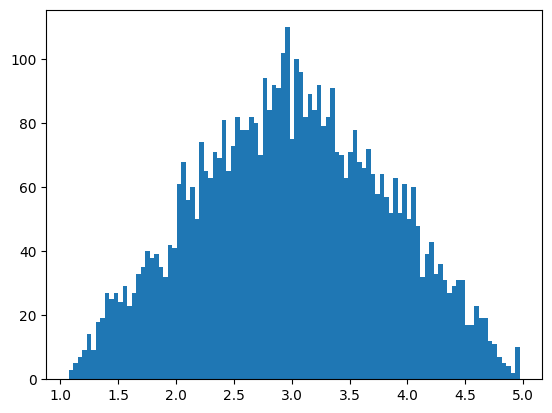

In [12]:
# Imprimimos el histograma con los valores aceptados
plt.hist(datos, bins=100)

In [13]:
# Calculamos e imprimimos la media y la varianza de la muestra
print("La media es:", np.mean(datos))
print("La varianza es:", np.var(datos))

# Resultados teóricos
media = (a+b+c)/3
var = np.sqrt((a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18)
print("\nComparando con los resultados teóricos:")
print("La media teórica:", media)
print("La varianza teórica:", var)

La media es: 3.0010692797305847
La varianza es: 0.6627344789025096

Comparando con los resultados teóricos:
La media teórica: 3.0
La varianza teórica: 0.816496580927726


In [14]:
# Cuántos valores fueron aceptados
len(datos)

5036